<a href="https://colab.research.google.com/github/trang-123-tech/trangcky/blob/main/trangcky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()  # Chọn kaggle.json từ máy tính


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"binhtrannnn","key":"1eedadba5a37f6bc17f4a4b9f33fe3d5"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d nirmalsankalana/dhan-shomadhan
!unzip -q dhan-shomadhan.zip -d rice_leaf_disease



Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/dhan-shomadhan
License(s): MIT


In [5]:
import splitfolders

splitfolders.ratio(
    "/content/rice_leaf_disease",
    output="/content/split_data",
    seed=42,
    ratio=(.7, .2, .1)
)


Copying files: 769 files [00:00, 2242.97 files/s]


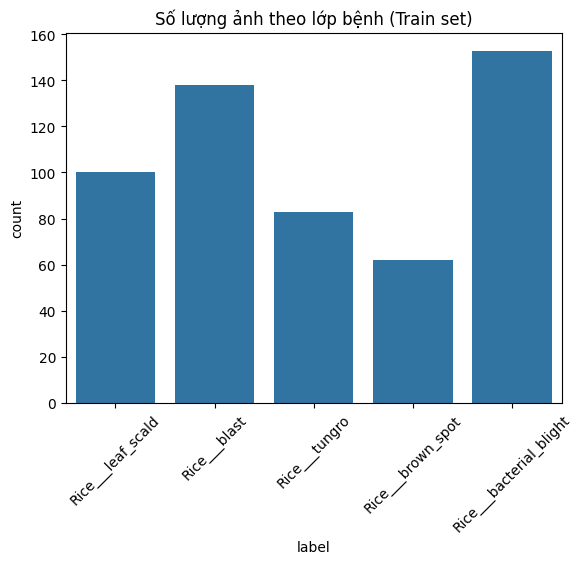

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_path = "/content/split_data/train"
data = {"label": [], "count": []}

for cls in os.listdir(train_path):
    data["label"].append(cls)
    data["count"].append(len(os.listdir(os.path.join(train_path, cls))))

df = pd.DataFrame(data)
sns.barplot(x="label", y="count", data=df)
plt.title("Số lượng ảnh theo lớp bệnh (Train set)")
plt.xticks(rotation=45)
plt.show()


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory("/content/split_data/train", target_size=(128,128), batch_size=32, class_mode='categorical')
val = val_gen.flow_from_directory("/content/split_data/val", target_size=(128,128), batch_size=32, class_mode='categorical')
test = test_gen.flow_from_directory("/content/split_data/test", target_size=(128,128), batch_size=32, class_mode='categorical', shuffle=False)


Found 536 images belonging to 5 classes.
Found 151 images belonging to 5 classes.
Found 82 images belonging to 5 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Dropout(0.3),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(train.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,669 (12.61 MB)

 Trainable params: 3,305,477 (12.61 MB)

 Non-trainable params: 192 (768.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.2038 - loss: 13.1143 - val_accuracy: 0.2848 - val_loss: 1.6031
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3593 - loss: 1.8349 - val_accuracy: 0.2053 - val_loss: 1.6009
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4683 - loss: 1.4581 - val_accuracy: 0.2450 - val_loss: 1.5927
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5058 - loss: 1.2638 - val_accuracy: 0.1854 - val_loss: 1.6133
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5060 - loss: 1.1850 - val_accuracy: 0.1921 - val_loss: 1.6224
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6216 - loss: 1.0261 - val_accuracy: 0.2185 - val_loss: 1.6941
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6318 - loss: 1.0002 - val_accuracy: 0.1921 - val_loss: 1.6693
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6232 - loss: 0.9273 - val_accuracy: 0.2848 - val_loss

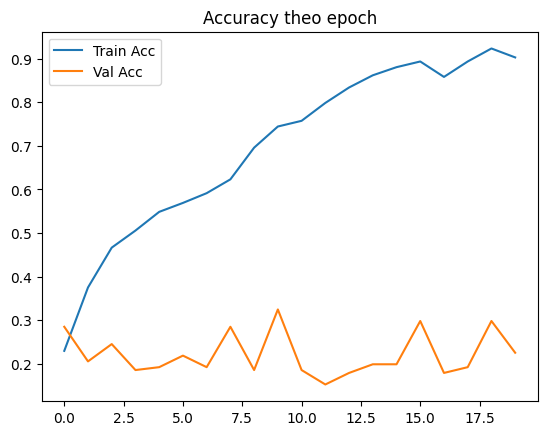

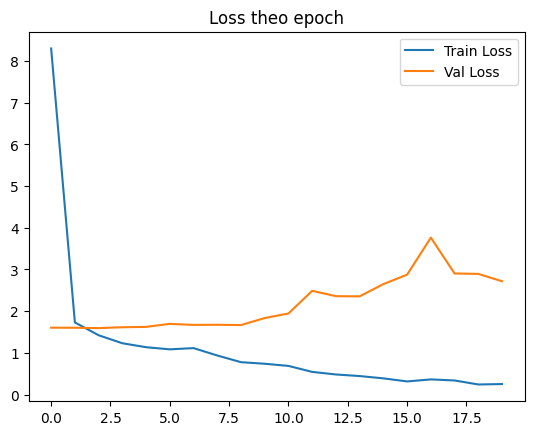

In [9]:
history = model.fit(train, epochs=20, validation_data=val)

# Vẽ biểu đồ loss & accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy theo epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss theo epoch')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


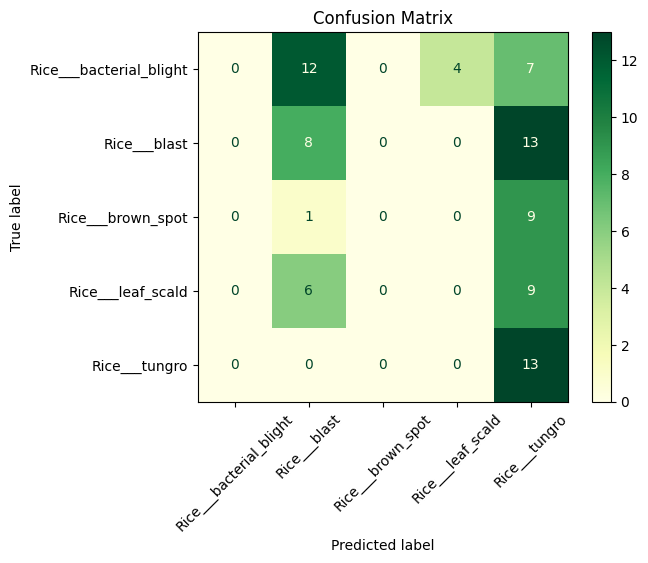

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds = model.predict(test)
y_pred = np.argmax(preds, axis=1)
y_true = test.classes
labels = list(test.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45, cmap="YlGn")
plt.title("Confusion Matrix")
plt.show()


In [12]:
import os

base_dir = "/content/rice_leaf_disease"
classes = os.listdir(base_dir)
print("Các lớp trong thư mục rice_leaf_disease:")
print(classes)


Các lớp trong thư mục rice_leaf_disease:
['Rice___leaf_scald', 'Rice___blast', 'Rice___tungro', 'Rice___brown_spot', 'Rice___bacterial_blight']


In [13]:
image_names = os.listdir(os.path.join(base_dir, classes[0]))  # thử với lớp đầu tiên
print("Một số ảnh ví dụ:", image_names[:5])


Một số ảnh ví dụ: ['ls_wb_122.jpg', 'ls_wb_35.jpg', 'ls_wb_11.jpg', 'ls_wb_82.jpg', 'ls_wb_108.jpg']


In [15]:
!find /content -name "ls_wb_122.jpg"


/content/split_data/val/Rice___leaf_scald/ls_wb_122.jpg
/content/rice_leaf_disease/Rice___leaf_scald/ls_wb_122.jpg


In [16]:
from keras.preprocessing import image
import numpy as np

img_path = "/content/rice_leaf_disease/Rice___leaf_scald/ls_wb_122.jpg"
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
predicted_class = np.argmax(pred)
print("Ảnh được dự đoán là lớp:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Ảnh được dự đoán là lớp: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
✅ Kết quả dự đoán: Rice___tungro
📊 Xác suất dự đoán từng lớp:
  Rice___bacterial_blight: 0.0011
  Rice___blast: 0.0955
  Rice___brown_spot: 0.0026
  Rice___leaf_scald: 0.0608
  Rice___tungro: 0.8400


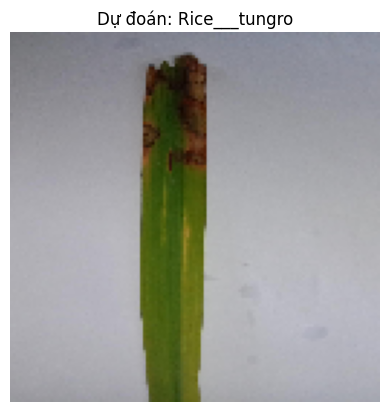

In [17]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# ✅ Đường dẫn ảnh cần dự đoán
img_path = "/content/rice_leaf_disease/Rice___leaf_scald/ls_wb_122.jpg"

# 📥 Load ảnh & xử lý
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)kho

# 🔍 Dự đoán
pred = model.predict(x)
predicted_index = np.argmax(pred)

# 🏷️ Lấy danh sách tên lớp từ train generator
class_labels = list(train.class_indices.keys())
predicted_label = class_labels[predicted_index]

# 📢 In kết quả
print("✅ Kết quả dự đoán:", predicted_label)
print("📊 Xác suất dự đoán từng lớp:")
for i, cls in enumerate(class_labels):
    print(f"  {cls}: {pred[0][i]:.4f}")

# 🖼️ Hiển thị ảnh và nhãn dự đoán
plt.imshow(img)
plt.axis('off')
plt.title(f"Dự đoán: {predicted_label}")
plt.show()
